# Ojus Sharma

## Research question/interests
**Who is best Wicket-Keeper in IPL History?** \
**Who are the top batting based and bowling based all-rounders in IPL History?** 

Selecting the top 11 players from the Indian Premier League (IPL) is a challenging task, considering the vast talent pool and individual performances across the 14 seasons. 
As an MS Dhoni fan, I am interested in finding the best wicket-keeper in IPL history. Further, I want to find the top 2 all-rounders in the IPL. Given the extensive database we have at hand, we wil calculate the of player statistics, including batting and bowling averages, strike rates, wicket-taking ability, playoff performance and other integral statistics. This data will be stored and processed in a separate file. I aim to use statistical analysis tools such as regression, correlation, and clustering to identify patterns and trends in the data. This would allow me to create a ranking system that factors in both individual and team performance, as well as the unique challenges and conditions of the IPL. Based on this analysis, I would identify the two best all-rounders and one wicketkeeper, taking into account factors such as consistency, reliability, and impact on the game.

In [231]:
import numpy as np

import pandas as pd
ball_by_ball = pd.read_csv("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")
ball_by_ball

matches = pd.read_csv("../data/raw/IPL_Matches_2008_2022 (1).csv")
matches

ball_by_ball

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [232]:
df = ball_by_ball
df = df.loc[:, ['ID', 'kind', 'fielders_involved']]
df

,ID,kind,fielders_involved
0,1312200,NaN,NaN
1,1312200,NaN,NaN
2,1312200,NaN,NaN
3,1312200,NaN,NaN
4,1312200,NaN,NaN
...,...,...,...
225949,335982,NaN,NaN
225950,335982,NaN,NaN
225951,335982,NaN,NaN
225952,335982,NaN,NaN


In [233]:
stumped = df[(df['kind'] == 'stumped')]
stumped

,ID,kind,fielders_involved
429,1312199,stumped,KD Karthik
1066,1304116,stumped,JM Sharma
1914,1304113,stumped,MS Wade
2148,1304112,stumped,Q de Kock
2504,1304110,stumped,JM Sharma
...,...,...,...
220783,336003,stumped,WP Saha
221030,336002,stumped,SP Goswami
223840,335990,stumped,Kamran Akmal
224580,335987,stumped,Kamran Akmal


In [234]:
unique_stumpers = stumped['fielders_involved'].unique()
us = unique_stumpers
us

array(['KD Karthik', 'JM Sharma', 'MS Wade', 'Q de Kock', 'RR Pant',
       'SV Samson', 'WP Saha', 'N Pooran', 'SW Billings', 'SP Jackson',
       'KS Bharat', 'JM Bairstow', 'MS Dhoni', 'AB de Villiers',
       'PA Patel', 'H Klaasen', 'KL Rahul', 'JC Buttler', 'Ishan Kishan',
       'AP Tare', 'Vishnu Vinod', 'RV Uthappa', 'KM Jadhav', 'NV Ojha',
       'CM Gautam', 'YV Takawale', 'MS Bisla', 'M Rawat', 'DH Yagnik',
       'Gurkeerat Singh', 'KB Arun Karthik', 'BB McCullum', 'SP Goswami',
       'N Saini', 'KH Devdhar', 'PR Shah', 'AC Gilchrist', 'AT Rayudu',
       'KC Sangakkara', 'DJ Jacobs', 'MV Boucher', 'Kamran Akmal'],
      dtype=object)

In [235]:
keeper_stats = df[(df['fielders_involved'].isin(us))]
ks = keeper_stats
ks

,ID,kind,fielders_involved
72,1312200,caught,WP Saha
243,1312199,caught,SV Samson
330,1312199,caught,JC Buttler
429,1312199,stumped,KD Karthik
460,1312199,caught,KD Karthik
...,...,...,...
225119,335985,stumped,MV Boucher
225498,335983,caught,KC Sangakkara
225640,335983,caught,PA Patel
225912,335982,caught,WP Saha


In [236]:
temp = ks[ks['kind'] == 'caught']
final_wicketkeeping =  ks.groupby(temp["fielders_involved"])[["kind"]].count()

temp = ks[ks['kind'] == 'stumped']
df2 =  ks.groupby(temp["fielders_involved"])[["kind"]].count()

df3 = pd.DataFrame(ks.groupby('fielders_involved')['ID'].nunique())
df3

df2

,kind
fielders_involved,
AB de Villiers,8
AC Gilchrist,16
AP Tare,6
AT Rayudu,2
BB McCullum,6
CM Gautam,4
DH Yagnik,5
DJ Jacobs,2
Gurkeerat Singh,1


In [237]:
final_wicketkeeping['Stumpings'] = df2['kind']
final_wicketkeeping['Innings'] = df3['ID']
final_wicketkeeping = final_wicketkeeping.rename(columns={'kind': 'Catches'})
final_wicketkeeping
fws=final_wicketkeeping

fws  = fws[(fws['Innings'] >= 30)]
final_wicketkeeping = fws
final_wicketkeeping

,Catches,Stumpings,Innings
fielders_involved,,,
AB de Villiers,120,8,99
AC Gilchrist,51,16,45
AT Rayudu,62,2,61
BB McCullum,38,6,39
JC Buttler,43,1,33
KC Sangakkara,45,9,37
KD Karthik,133,34,123
KL Rahul,59,5,53
KM Jadhav,30,7,30


In [238]:
final_wicketkeeping['Dismissals'] = (final_wicketkeeping['Catches'] + final_wicketkeeping['Stumpings'])
final_wicketkeeping['Dis/Inn'] = (final_wicketkeeping['Dismissals'])/final_wicketkeeping['Innings']
final_wicketkeeping= final_wicketkeeping.sort_values('Dis/Inn', ascending=False)
fws = final_wicketkeeping
fws

,Catches,Stumpings,Innings,Dismissals,Dis/Inn
fielders_involved,,,,,
Q de Kock,65,15,47,80,1.702128
RR Pant,64,18,55,82,1.490909
AC Gilchrist,51,16,45,67,1.488889
WP Saha,79,22,68,101,1.485294
KC Sangakkara,45,9,37,54,1.459459
RV Uthappa,92,32,89,124,1.393258
MS Dhoni,135,39,127,174,1.370079
KD Karthik,133,34,123,167,1.357724
JC Buttler,43,1,33,44,1.333333


### **Exploratory Data Analysis**

##### **#1**
At a glance from above, we see that in the matches with the keeper making dismissals, WP Saha seems to be the best. Since this is only Exploratory data analysis, this doesn't mean that Saha is the best wicketkeeper of all time in the IPL.
However, dwelling deeper into visualizations, we see that MS Dhoni and KD Karthik have the most dismissals in IPL history.

Text(0, 0.5, 'Player Names')

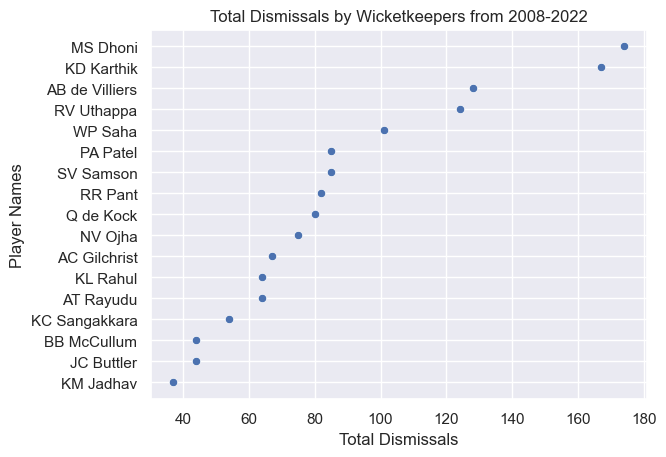

In [250]:
import seaborn as snsv 
import matplotlib.pyplot as plt
fws=fws.sort_values('Dismissals', ascending=False)
sns.set_theme(style="darkgrid")
sns.scatterplot(data=fws, x='Dismissals', y='fielders_involved')
plt.title('Total Dismissals by Wicketkeepers from 2008-2022')
plt.xlabel('Total Dismissals')
plt.ylabel('Player Names')


**We clearly see that MS Dhoni and Karthik are separate from the rest with respect to dismissals in the IPL. This paints a picture of their longevity in the sport at the highest level.**

##### **#2**